# SVM 参数的影响

曾**

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.svm import SVC

In [2]:
#创建数据集
n_samples = 100

d_blobs = make_blobs(n_samples=n_samples, centers=2,random_state=0, cluster_std=0.60)

d_circles = make_circles(n_samples=n_samples, factor=.1, noise=.1)

d_moons = make_moons(n_samples=n_samples,noise=0.1)

In [3]:
datasets = [d_blobs, d_circles, d_moons]

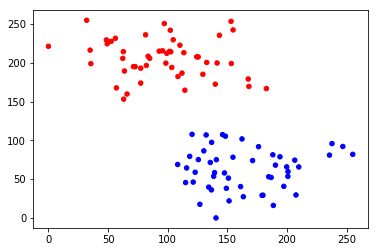

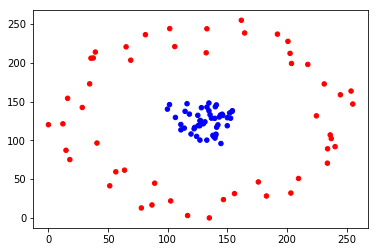

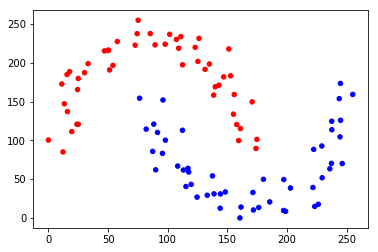

In [4]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['Red', 'Blue'])

for plot_num,data in enumerate(datasets):

    X, y = data
    
    X[:,0] = ((X[:, 0]-min(X[:, 0]))/(max(X[:, 0])-min(X[:, 0])))*255
    X[:,1] = ((X[:, 1]-min(X[:, 1]))/(max(X[:, 1])-min(X[:, 1])))*255
    
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=cm_bright)
    plt.show()

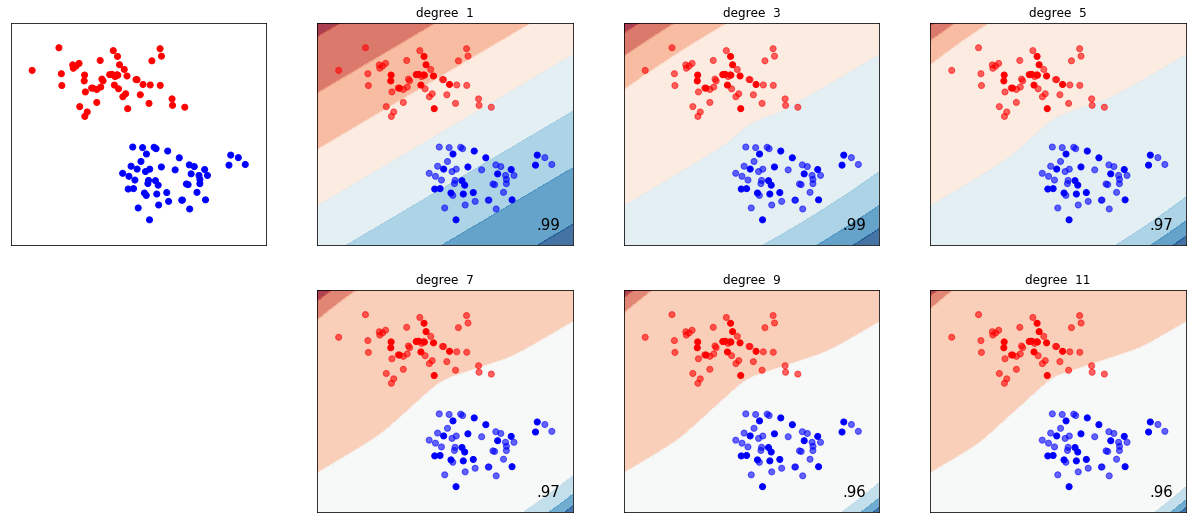

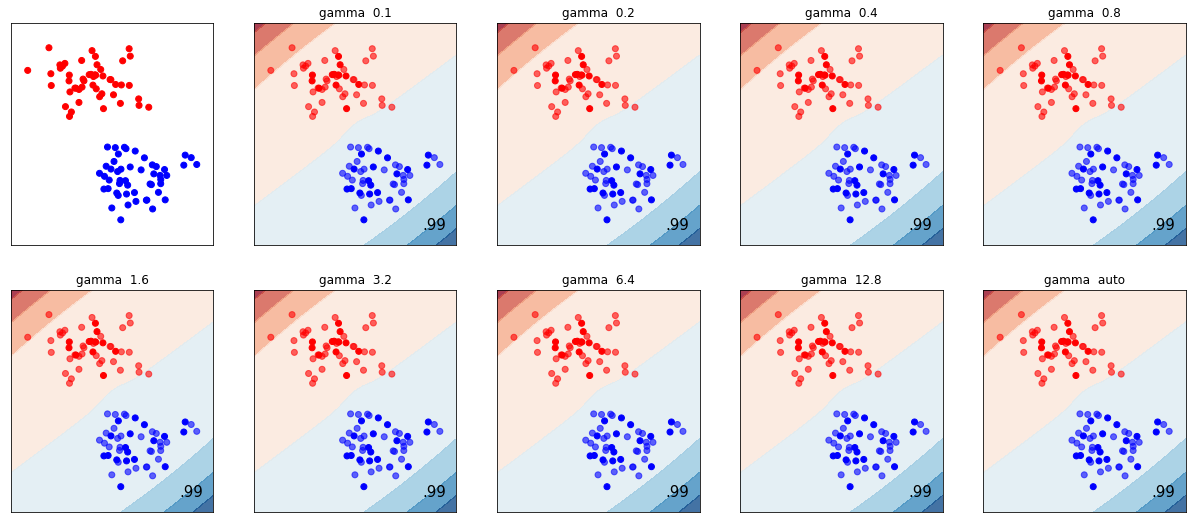

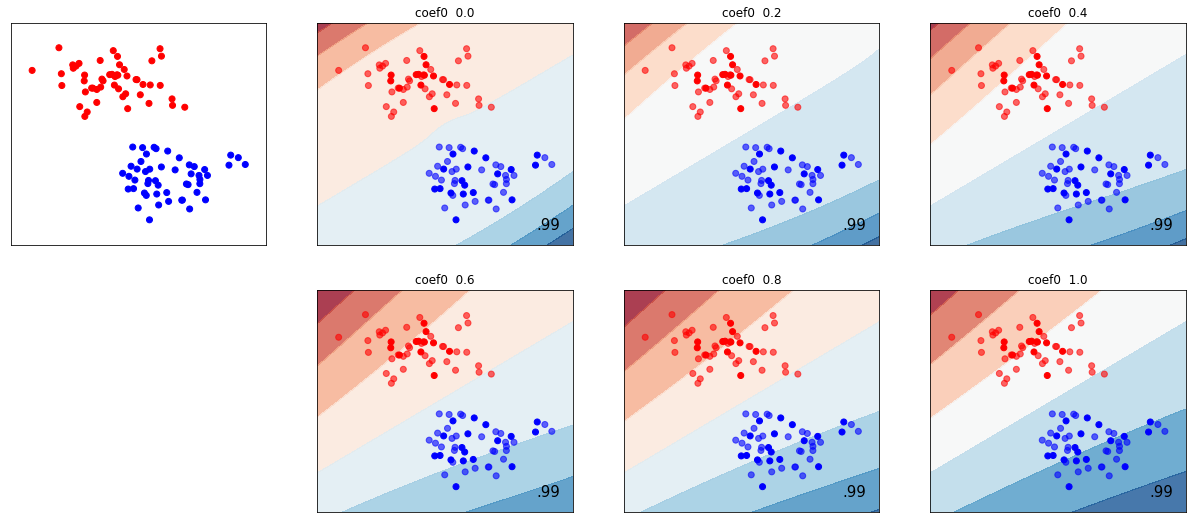

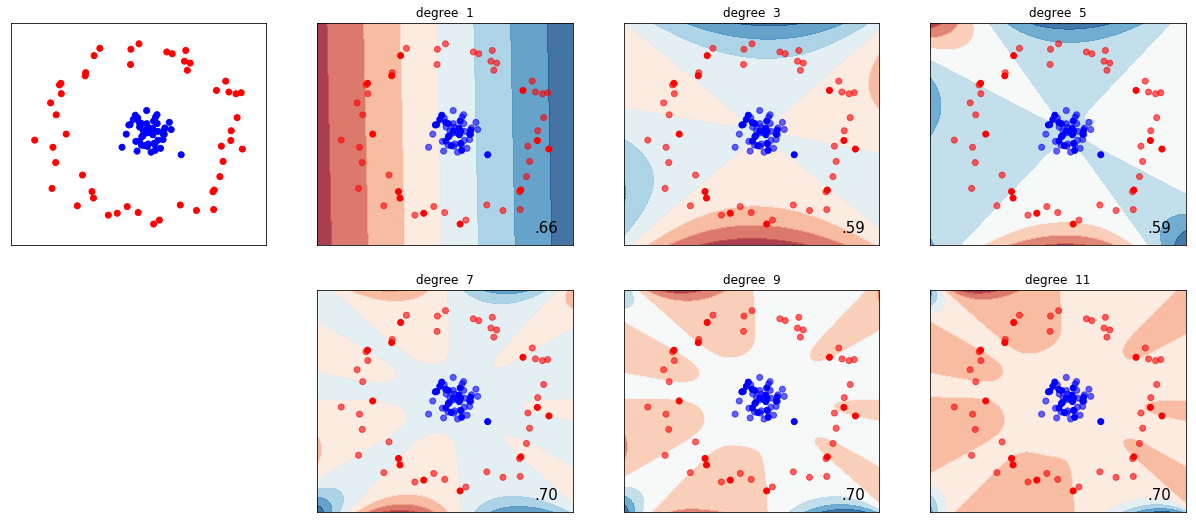

In [ ]:
#kernel == poly
from sklearn.metrics import accuracy_score

h = 0.02

poly = ['degree', 'gamma', 'coef0']


for X, y in datasets:
    
    
    #数据分为训练集和测试集
    X = preprocessing.StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.7, random_state = 1)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    
    for p in poly:
        #change the value of degree
        if p == 'degree':
            figure = plt.figure(figsize=(17, 9))
            
            degree = np.arange(1, 12, 2)
            names_d = []
            for i in degree:
                names_d.append('degree  ' + str(i))
                
            classifiers = []
            for i in degree:
                classifiers.append(SVC(kernel= 'poly', degree= i, gamma= 'auto', coef0= 0.0, C= 1E10))
                
            # just plot the dataset first
            cm = plt.cm.RdBu
            cm_bright = ListedColormap(['Red', 'Blue'])
            ax = plt.subplot(2, 4, 1)
                
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright)
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
                
            j = 2
                
            for name, clf in zip(names_d, classifiers):
                ax = plt.subplot(2, 4, j)
                    
                clf.fit(X_train, y_train) 
                y_pred = clf.predict(X_test)  
                score = clf.score(X_test, y_test)
                    
                # Plot the decision boundary. For that, we will assign a color to each
                # point in the mesh [x_min, x_max]x[y_min, y_max].
                if hasattr(clf, "decision_function"):
                    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
                else:
                    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
                        
                # Put the result into a color plot
                Z = Z.reshape(xx.shape)
                ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

                # Plot also the training points
                ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
                # and testing points
                ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

                ax.set_xlim(xx.min(), xx.max())
                ax.set_ylim(yy.min(), yy.max())
                ax.set_xticks(())
                ax.set_yticks(())
                ax.set_title(name)
                ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                        size=15, horizontalalignment='right')
                    
                j += 1
                if j == 5:
                    j += 1
            
        figure.subplots_adjust(left=.02, right=.98)
        plt.show()
        
        
        #change the value of gamma 
        if p == 'gamma':
            figure = plt.figure(figsize=(17, 9))
            
            gamma = np.logspace(0, 7, num= 8, base= 2)*0.1
            names_g = []
            for i in gamma:
                names_g.append('gamma  ' + str(i))
            names_g.append('gamma  ' + 'auto')
                
            classifiers = []
            for i in gamma:
                classifiers.append(SVC(kernel= 'poly', degree= 3, gamma= i, coef0= 0.0, C= 1E10))
            classifiers.append(SVC(kernel= 'poly', degree= 3, gamma= 'auto', coef0= 0.0, C= 1E10))
                
            # just plot the dataset first
            cm = plt.cm.RdBu
            cm_bright = ListedColormap(['Red', 'Blue'])
            ax = plt.subplot(2, 5, 1)
                
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright)
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
                
            j = 2
                
            for name, clf in zip(names_g, classifiers):
                ax = plt.subplot(2, 5, j)
                    
                clf.fit(X_train, y_train) 
                y_pred = clf.predict(X_test)  
                score = clf.score(X_test, y_test)
                    
                # Plot the decision boundary. For that, we will assign a color to each
                # point in the mesh [x_min, x_max]x[y_min, y_max].
                if hasattr(clf, "decision_function"):
                    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
                else:
                    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
                        
                # Put the result into a color plot
                Z = Z.reshape(xx.shape)
                ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

                # Plot also the training points
                ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
                # and testing points
                ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

                ax.set_xlim(xx.min(), xx.max())
                ax.set_ylim(yy.min(), yy.max())
                ax.set_xticks(())
                ax.set_yticks(())
                ax.set_title(name)
                ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                        size=15, horizontalalignment='right')
                    
                j += 1
                
                    
        figure.subplots_adjust(left=.02, right=.98)
        plt.show()
        
        
        #change the value of r
        if p == 'coef0':
            figure = plt.figure(figsize=(17, 9))
            
            r = np.arange(0.0, 1.1, 0.2)
            names_r = []
            for i in r:
                names_r.append('coef0  ' + str(i))
                
            classifiers = []
            for i in r:
                classifiers.append(SVC(kernel= 'poly', degree= 3, gamma= 'auto', coef0= i, C= 1E10))
                
            # just plot the dataset first
            cm = plt.cm.RdBu
            cm_bright = ListedColormap(['Red', 'Blue'])
            ax = plt.subplot(2, 4, 1)
                
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright)
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
                
            j = 2
                
            for name, clf in zip(names_r, classifiers):
                ax = plt.subplot(2, 4, j)
                    
                clf.fit(X_train, y_train) 
                y_pred = clf.predict(X_test)  
                score = clf.score(X_test, y_test)
                    
                # Plot the decision boundary. For that, we will assign a color to each
                # point in the mesh [x_min, x_max]x[y_min, y_max].
                if hasattr(clf, "decision_function"):
                    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
                else:
                    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
                        
                # Put the result into a color plot
                Z = Z.reshape(xx.shape)
                ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

                # Plot also the training points
                ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
                # and testing points
                ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

                ax.set_xlim(xx.min(), xx.max())
                ax.set_ylim(yy.min(), yy.max())
                ax.set_xticks(())
                ax.set_yticks(())
                ax.set_title(name)
                ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                        size=15, horizontalalignment='right')
                    
                j += 1
                if j == 5:
                    j += 1
                    
        figure.subplots_adjust(left=.02, right=.98)
        plt.show()
            

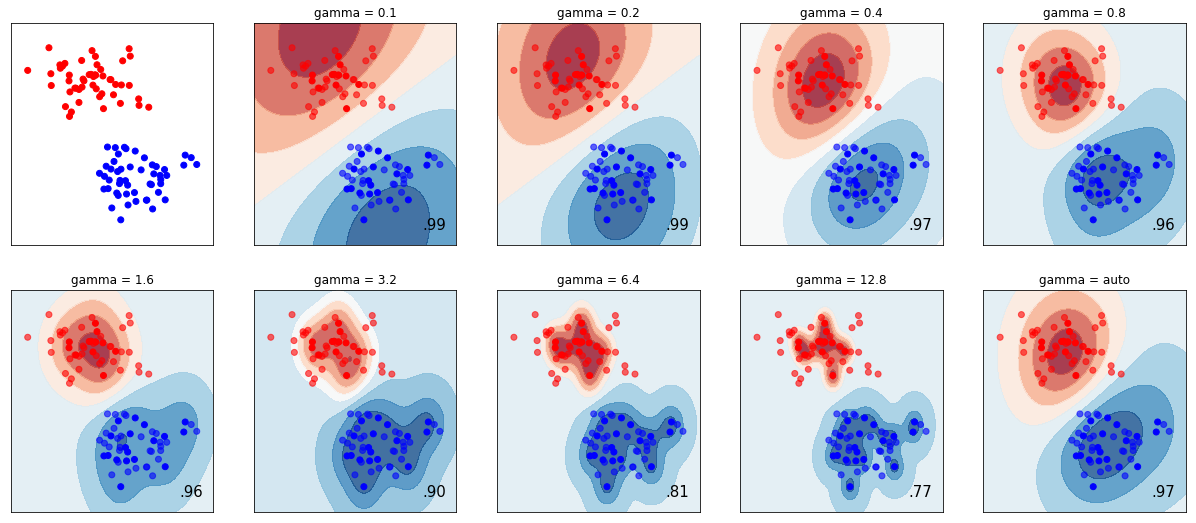

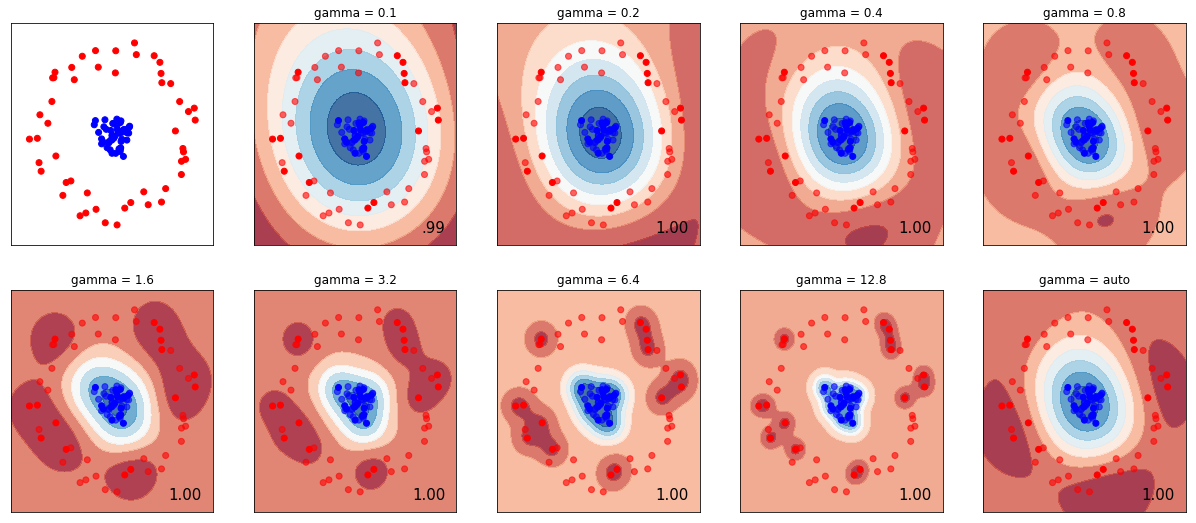

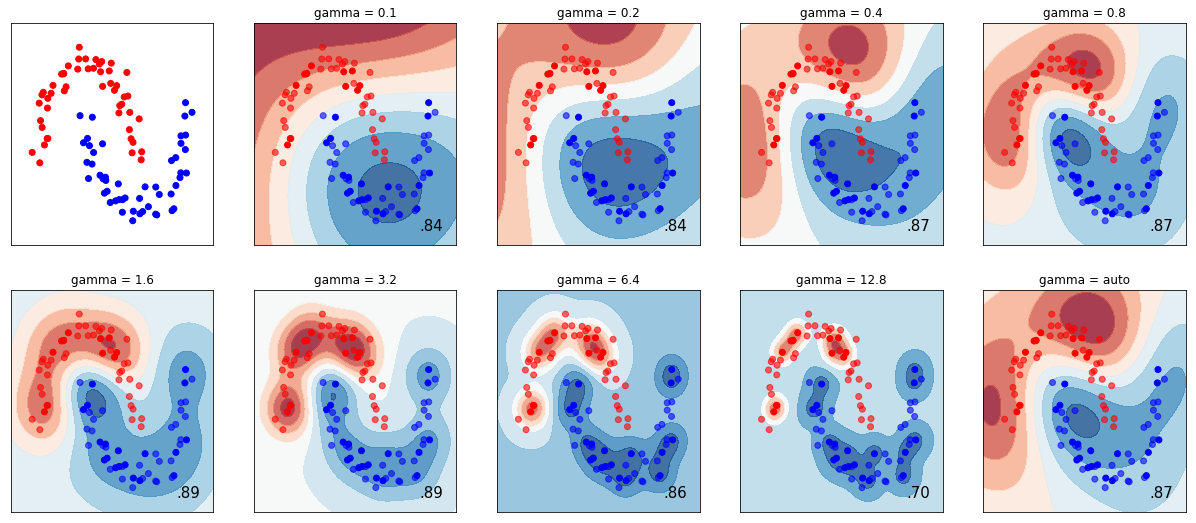

In [5]:
#kernel == rbf
from sklearn.metrics import accuracy_score

h = 0.02

for X, y in datasets:
    #数据分为训练集和测试集
    X = preprocessing.StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.7, random_state = 1)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    figure = plt.figure(figsize=(17, 9))
    
    #change the value of gamma
    gamma = np.logspace(0, 7, num= 8, base= 2)*0.1
    names = []
    for i in gamma:
        names.append('gamma = ' + str(i))
    names.append('gamma = ' + 'auto')
                
    classifiers = []
    for i in gamma:
        classifiers.append(SVC(kernel= 'rbf', degree= 3, gamma= i, coef0= 0.0, C= 1E10))
    classifiers.append(SVC(kernel= 'rbf', degree= 3, gamma= 'auto', coef0= 0.0, C= 1E10))
                
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['Red', 'Blue'])
    ax = plt.subplot(2, 5, 1)
                
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
                
    j = 2
                
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(2, 5, j)
                    
        clf.fit(X_train, y_train) 
        y_pred = clf.predict(X_test)  
        score = clf.score(X_test, y_test)
                    
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
                        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
                    
        j += 1
                
                    
    figure.subplots_adjust(left=.02, right=.98)
    plt.show()

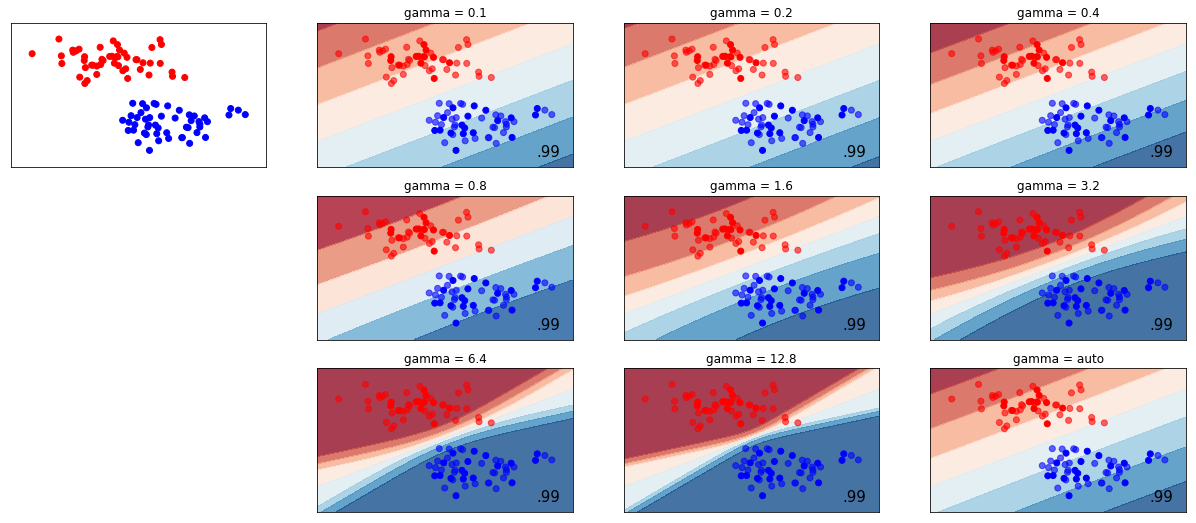

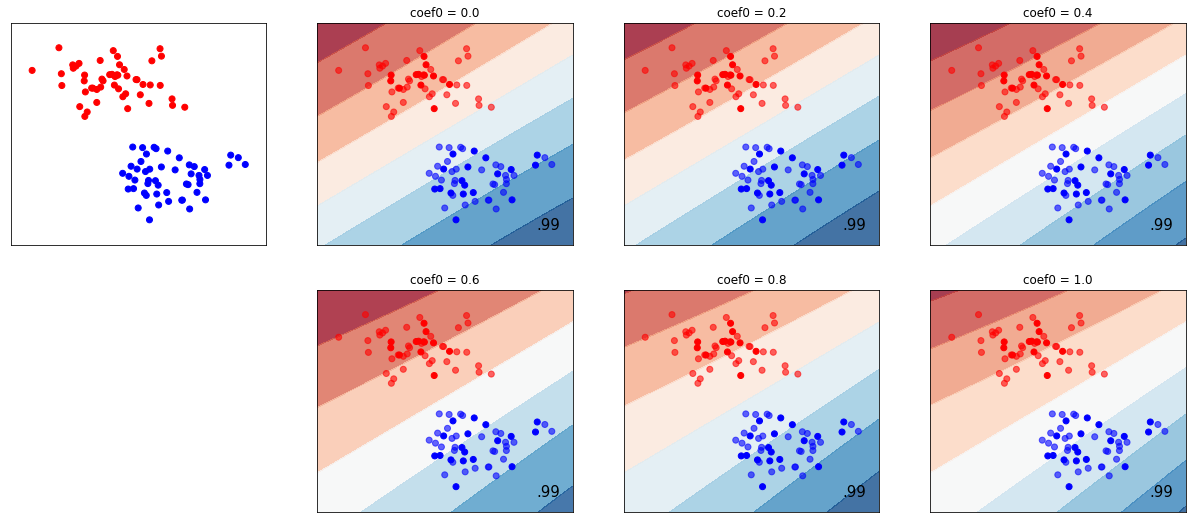

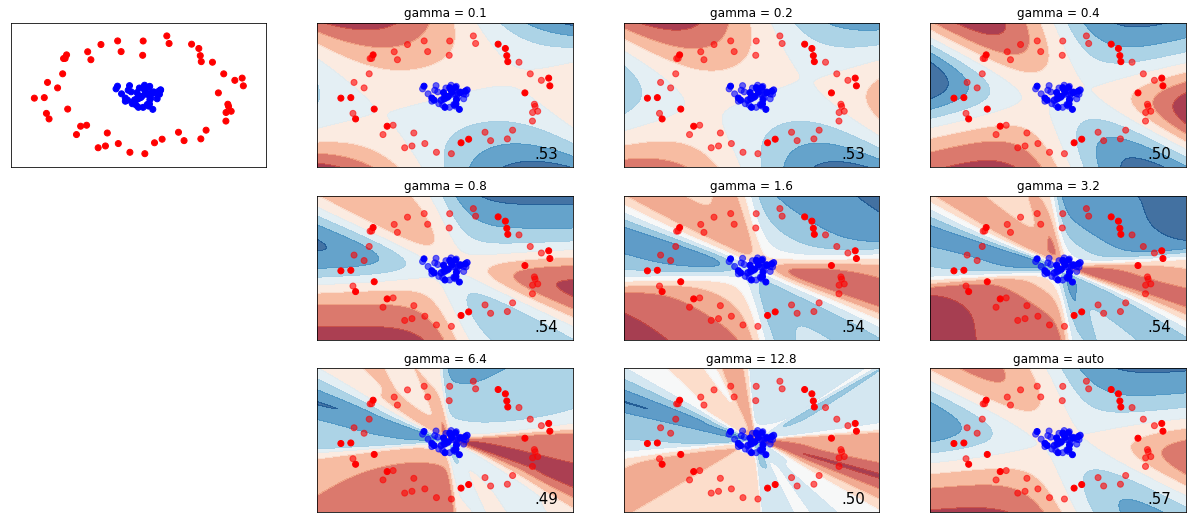

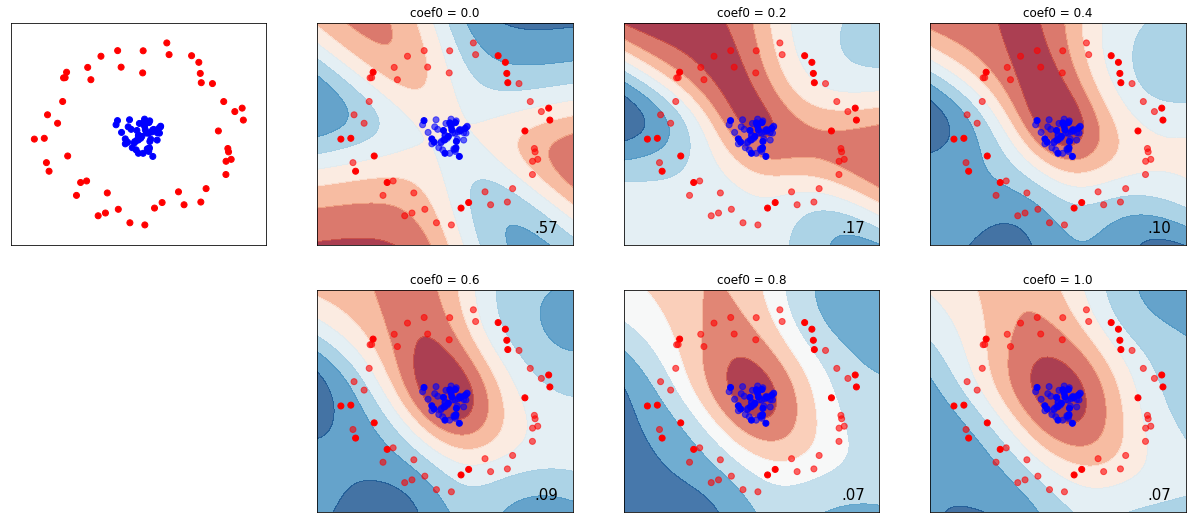

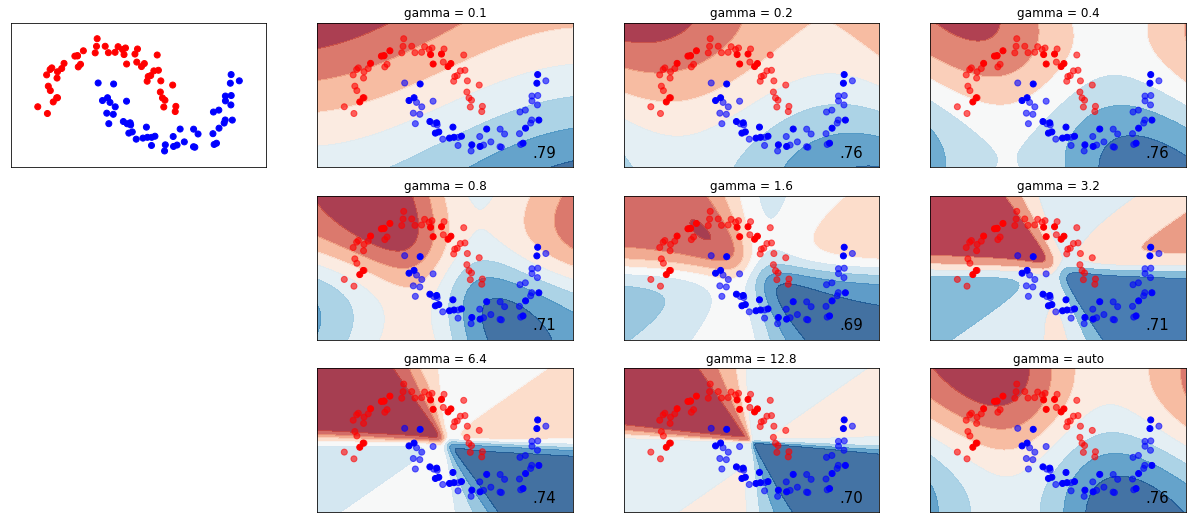

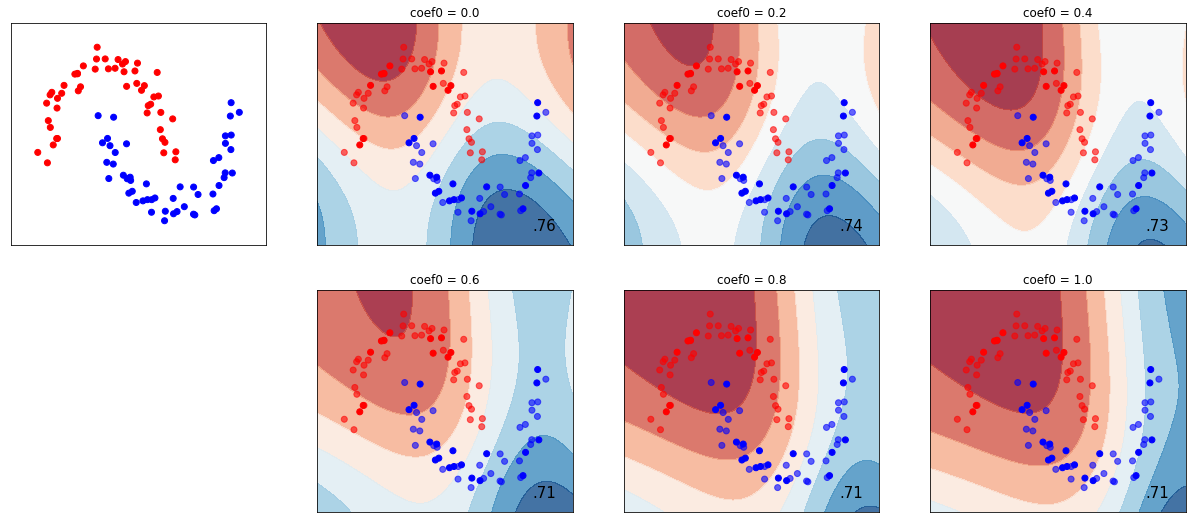

In [8]:
#kernel == sigmoid
from sklearn.metrics import accuracy_score

h = 0.02

sigmoid = ['gamma', 'coef0']


for X, y in datasets:
    
    
    #数据分为训练集和测试集
    X = preprocessing.StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.7, random_state = 1)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    
    for s in sigmoid:
        
        #change the value of gamma 
        if s == 'gamma':
            figure = plt.figure(figsize=(17, 9))
            
            gamma = np.logspace(0, 7, num= 8, base= 2)*0.1
            names_g = []
            for i in gamma:
                names_g.append('gamma = ' + str(i))
            names_g.append('gamma = ' + 'auto')
                
            classifiers = []
            for i in gamma:
                classifiers.append(SVC(kernel= 'sigmoid', degree= 3, gamma= i, coef0= 0.0, C= 1E10))
            classifiers.append(SVC(kernel= 'sigmoid', degree= 3, gamma= 'auto', coef0= 0.0, C= 1E10))
                
            # just plot the dataset first
            cm = plt.cm.RdBu
            cm_bright = ListedColormap(['Red', 'Blue'])
            ax = plt.subplot(3, 4, 1)
                
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright)
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
                
            j = 2
                
            for name, clf in zip(names_g, classifiers):
                ax = plt.subplot(3, 4, j)
                    
                clf.fit(X_train, y_train) 
                y_pred = clf.predict(X_test)  
                score = clf.score(X_test, y_test)
                    
                # Plot the decision boundary. For that, we will assign a color to each
                # point in the mesh [x_min, x_max]x[y_min, y_max].
                if hasattr(clf, "decision_function"):
                    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
                else:
                    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
                        
                # Put the result into a color plot
                Z = Z.reshape(xx.shape)
                ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

                # Plot also the training points
                ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
                # and testing points
                ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

                ax.set_xlim(xx.min(), xx.max())
                ax.set_ylim(yy.min(), yy.max())
                ax.set_xticks(())
                ax.set_yticks(())
                ax.set_title(name)
                ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                        size=15, horizontalalignment='right')
                    
                j += 1
                if ((j == 5) or (j == 9)):
                    j += 1
                
                    
        figure.subplots_adjust(left=.02, right=.98)
        plt.show()
        
        
        #change the value of r
        if s == 'coef0':
            figure = plt.figure(figsize=(17, 9))
            
            r = np.arange(0.0, 1.1, 0.2)
            names_r = []
            for i in r:
                names_r.append('coef0 = ' + str(i))
                
            classifiers = []
            for i in r:
                classifiers.append(SVC(kernel= 'sigmoid', degree= 3, gamma= 'auto', coef0= i, C= 1E10))
                
            # just plot the dataset first
            cm = plt.cm.RdBu
            cm_bright = ListedColormap(['Red', 'Blue'])
            ax = plt.subplot(2, 4, 1)
                
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright)
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
                
            j = 2
                
            for name, clf in zip(names_r, classifiers):
                ax = plt.subplot(2, 4, j)
                    
                clf.fit(X_train, y_train) 
                y_pred = clf.predict(X_test)  
                score = clf.score(X_test, y_test)
                    
                # Plot the decision boundary. For that, we will assign a color to each
                # point in the mesh [x_min, x_max]x[y_min, y_max].
                if hasattr(clf, "decision_function"):
                    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
                else:
                    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
                        
                # Put the result into a color plot
                Z = Z.reshape(xx.shape)
                ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

                # Plot also the training points
                ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
                # and testing points
                ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

                ax.set_xlim(xx.min(), xx.max())
                ax.set_ylim(yy.min(), yy.max())
                ax.set_xticks(())
                ax.set_yticks(())
                ax.set_title(name)
                ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                        size=15, horizontalalignment='right')
                    
                j += 1
                if ((j == 5) or (j == 9)):
                    j += 1
                    
        figure.subplots_adjust(left=.02, right=.98)
        plt.show()